<a href="https://colab.research.google.com/github/shivani-202/hate-speech-detection-and-classification-/blob/main/HSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HATE SPEECH DETECTION AND CLASSIFICATION MODEL**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/modified_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,label,tweet,cleaned_tweet,bigrams_list,trigrams_list,dominant_topic
0,0,0,0,@user when a father is dysfunctional and is s...,"['father', 'dysfunctional', 'selfish', 'drag',...","['father dysfunctional', 'dysfunctional selfis...","['father dysfunctional selfish', 'dysfunctiona...",6
1,1,1,0,@user @user thanks for #lyft credit i can't us...,"['thanks', 'lyft', 'credit', 'cant', 'use', 'c...","['thanks lyft', 'lyft credit', 'credit cant', ...","['thanks lyft credit', 'lyft credit cant', 'cr...",6
2,2,2,0,bihday your majesty,"['bihday', 'majesty']",['bihday majesty'],[],5
3,3,3,0,#model i love u take with u all the time in ...,"['model', 'love', 'u', 'take', 'u', 'time', 'ur']","['model love', 'love u', 'u take', 'take u', '...","['model love u', 'love u take', 'u take u', 't...",5
4,4,4,0,factsguide: society now #motivation,"['factsguide', 'society', 'motivation']","['factsguide society', 'society motivation']",['factsguide society motivation'],0


Epoch 1/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 221s 149ms/step - accuracy: 0.8264 - loss: 0.4741 - val_accuracy: 0.9396 - val_loss: 0.2314
Epoch 2/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 198s 140ms/step - accuracy: 0.9648 - loss: 0.1608 - val_accuracy: 0.9348 - val_loss: 0.2269
Epoch 3/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 216s 149ms/step - accuracy: 0.9851 - loss: 0.0819 - val_accuracy: 0.9385 - val_loss: 0.2453
Epoch 4/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 202s 142ms/step - accuracy: 0.9931 - loss: 0.0431 - val_accuracy: 0.9344 - val_loss: 0.3075
Epoch 5/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 201s 142ms/step - accuracy: 0.9951 - loss: 0.0290 - val_accuracy: 0.9325 - val_loss: 0.3085
Epoch 6/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 199s 140ms/step - accuracy: 0.9968 - loss: 0.0210 - val_accuracy: 0.9299 - val_loss: 0.3600
Epoch 7/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 204s 143ms/step - accuracy: 0.9974 - loss: 0.0156 - val_accuracy: 0.9292 - val_loss: 0.3976
Epoch 8/20
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 260s 142ms/step - ac

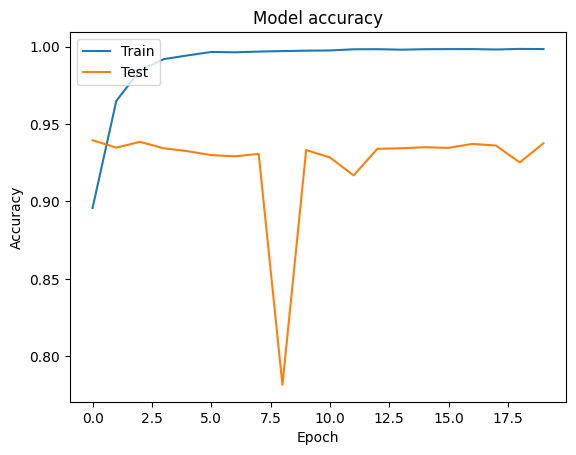

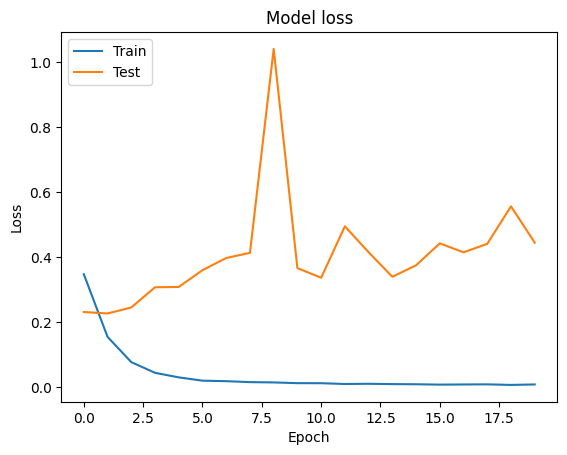

355/355 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95      6736
     Class 1       0.94      0.91      0.92      4613

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.93     11349
weighted avg       0.94      0.94      0.94     11349

Overall Accuracy: 0.9376156489558551


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time

# Tokenize and preprocess data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_tweet'])  # Ensure tokenizer is fitted
X = tokenizer.texts_to_sequences(df['cleaned_tweet'])

# Padding sequences
max_len = 100
X_padded = pad_sequences(X, maxlen=max_len)

# Convert target variable to categorical (assuming binary classification with 2 classes)
dominant_topic_bigrams = tf.keras.utils.to_categorical(df['label'], num_classes=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, dominant_topic_bigrams, test_size=0.2, random_state=42)

# Define the Conv-BiRNN-BiLSTM model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=10000, output_dim=128))

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# BiRNN Layer
model.add(tf.keras.layers.Bidirectional(SimpleRNN(64, return_sequences=True)))

# BiLSTM Layer
model.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))

# Output Layer (for 2 classes)
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    )
# callbacks=[early_stopping]

# Calculate time taken
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predictions for classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

# Generate evaluation metrics
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Overall accuracy
overall_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy}")


ABALATION STUDY:

In [ ]:
# Removing convolutional layer

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time

# Tokenize and preprocess data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_tweet'])  # Ensure tokenizer is fitted
X = tokenizer.texts_to_sequences(df['cleaned_tweet'])

# Padding sequences
max_len = 100
X_padded = pad_sequences(X, maxlen=max_len)

# Convert target variable to categorical (assuming binary classification with 2 classes)
dominant_topic_bigrams = tf.keras.utils.to_categorical(df['label'], num_classes=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, dominant_topic_bigrams, test_size=0.2, random_state=42)

# Define the Conv-BiRNN-BiLSTM model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=10000, output_dim=128))

# Convolutional Layer
# model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization())

# BiRNN Layer
model.add(tf.keras.layers.Bidirectional(SimpleRNN(64, return_sequences=True)))

# BiLSTM Layer
model.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))

# Output Layer (for 2 classes)
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]
                    )


# Calculate time taken
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predictions for classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

# Generate evaluation metrics
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Overall accuracy
overall_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy}")


Epoch 1/20
  30/1419 ━━━━━━━━━━━━━━━━━━━━ 4:24 190ms/step - accuracy: 0.5611 - loss: 0.8144

KeyboardInterrupt: 

In [ ]:
# Removing BiLSTM Layer

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time

# Tokenize and preprocess data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_tweet'])  # Ensure tokenizer is fitted
X = tokenizer.texts_to_sequences(df['cleaned_tweet'])

# Padding sequences
max_len = 100
X_padded = pad_sequences(X, maxlen=max_len)

# Convert target variable to categorical (assuming binary classification with 2 classes)
dominant_topic_bigrams = tf.keras.utils.to_categorical(df['label'], num_classes=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, dominant_topic_bigrams, test_size=0.2, random_state=42)

# Define the Conv-BiRNN-BiLSTM model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=10000, output_dim=128))

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# BiRNN Layer
model.add(tf.keras.layers.Bidirectional(SimpleRNN(64, return_sequences=True)))

# BiLSTM Layer
model.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))

# Output Layer (for 2 classes)
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    )
# callbacks=[early_stopping]

# Calculate time taken
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predictions for classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

# Generate evaluation metrics
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Overall accuracy
overall_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy}")
